In [1]:
# imports for array-handling and plotting
import numpy as np
import matplotlib
import cv2
import matplotlib.pyplot as plt

# let's keep our keras backend tensorflow quiet
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
# for testing on CPU
#os.environ['CUDA_VISIBLE_DEVICES'] = ''

# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation,Flatten
from keras.utils import np_utils

In [2]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [3]:
w = 26
h = 26
train = []
for image in X_train:
    #read images path
    img = image
    re = cv2.resize(img, (w,h))
    train.append(re)

test = []
for image in X_test:
    #read images path
    img = image
    re = cv2.resize(img, (w,h))
    test.append(re)

<ipython-input-4-b81054623548>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


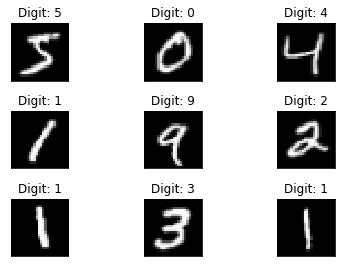

In [4]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
fig.show()

In [5]:
train=np.array(train)
test=np.array(test)

In [6]:
X_train = train.reshape(60000, w*h)
X_test = test.reshape(10000, w*h)

X_train=X_train/255
X_test=X_test/255


In [7]:
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train,n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [8]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(384, input_shape=(w*h,)))
model.add(Activation('relu'))

model.add(Dense(394))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

In [9]:
model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 384)               259968    
_________________________________________________________________
activation (Activation)      (None, 384)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 394)               151690    
_________________________________________________________________
activation_1 (Activation)    (None, 394)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3950      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 415,608
Trainable params: 415,608
Non-trainable params: 0
__________________________________________________

In [11]:
model.fit(X_train, Y_train, batch_size=686, epochs=30,validation_data=(X_test, Y_test))

Epoch 1/30
88/88 [==============================] - 3s 34ms/step - loss: 0.4238 - acc: 0.8879 - val_loss: 0.1926 - val_acc: 0.9425
Epoch 2/30
88/88 [==============================] - 3s 31ms/step - loss: 0.1541 - acc: 0.9551 - val_loss: 0.1199 - val_acc: 0.9638
Epoch 3/30
88/88 [==============================] - 3s 31ms/step - loss: 0.1025 - acc: 0.9700 - val_loss: 0.0969 - val_acc: 0.9713
Epoch 4/30
88/88 [==============================] - 3s 31ms/step - loss: 0.0748 - acc: 0.9782 - val_loss: 0.0838 - val_acc: 0.9745
Epoch 5/30
88/88 [==============================] - 3s 34ms/step - loss: 0.0600 - acc: 0.9815 - val_loss: 0.0720 - val_acc: 0.9782
Epoch 6/30
88/88 [==============================] - 3s 34ms/step - loss: 0.0475 - acc: 0.9864 - val_loss: 0.0662 - val_acc: 0.9798
Epoch 7/30
88/88 [==============================] - 3s 32ms/step - loss: 0.0389 - acc: 0.9882 - val_loss: 0.0640 - val_acc: 0.9796
Epoch 8/30
88/88 [==============================] - 3s 31ms/step - loss: 0.0328 - a

In [12]:
model.evaluate(X_test,Y_test)[1]

313/313 [==============================] - 1s 2ms/step - loss: 0.0685 - acc: 0.9836


0.9836000204086304

In [20]:
pred=model.predict(X_test)
for i in range(0,len(pred)):
    for j in range(0,len(pred[0])):
        if(pred[i][j]>=0.5):
            pred[i][j]=int(1)
        else:
            pred[i][j]=int(0)

In [22]:
pred=np.argmax(pred,1)

In [24]:
ytest=np.argmax(Y_test,1)

In [26]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(ytest,pred)

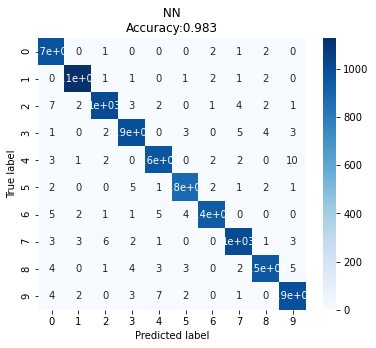

In [29]:
import matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt
cm_df = pd.DataFrame(cm,
                     index = np.unique(ytest), 
                     columns = np.unique(ytest))

plt.figure(figsize=(6,5))
sns.heatmap(cm_df,cmap="Blues", annot=True)
plt.title(' NN \nAccuracy:{0:.3f}'.format(accuracy_score(ytest, pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()